In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import norm
from sklearn.metrics import mean_squared_error
import scipy
import scipy.stats
from scipy.optimize import curve_fit
from pylab import exp
from scipy import optimize
from math import sqrt
import glob
import seaborn as sns
import h5py   
from matplotlib.colors import LogNorm, Normalize
from scipy.signal import find_peaks

In [2]:
def tot(time, ch):
    half= max(ch)/2
    i=0
    while ch[i]<half:
        i=i+1
    j=i+30
    while ch[j]>half:
        j=j+1
    tott= time[j]-time[i]
    return tott, j, i

In [3]:
folder=glob.glob("/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/calibration/*")
folder= sorted(folder)
file= glob.glob("{}/*".format(folder[1]))




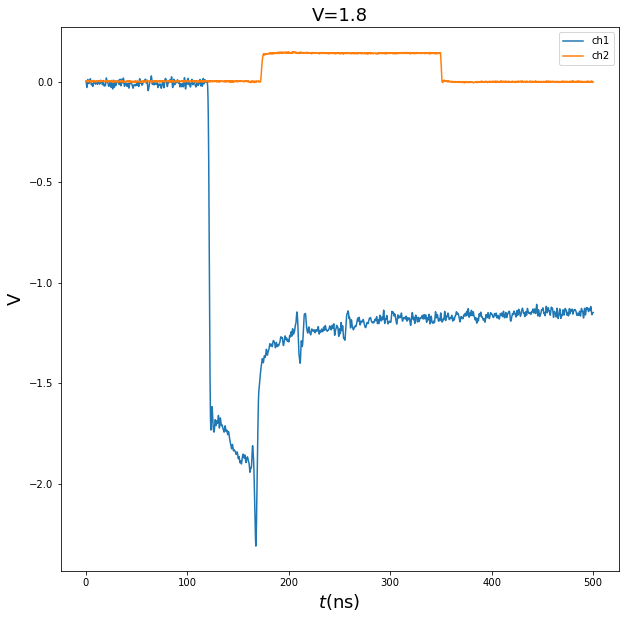

In [4]:
lol=7

folder=glob.glob("/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/calibration/*")
folder= sorted(folder)
file= glob.glob("{}/*".format(folder[lol]))


data=h5py.File(file[lol])
data=data["Waveforms"]
ch1= data["Channel 1"]
ch2= data["Channel 2"]
ch1= ch1["Channel 1Data"]
ch1= np.array(ch1)
ch2= ch2["Channel 2Data"]
ch2= np.array(ch2)

time= np.linspace(0,((1/(8.001*10**9))*8001)*10**9/2, 8001)


fig = plt.figure(figsize=(10,10))
plt.plot(time,ch1, label="ch1")
plt.plot(time,ch2, label="ch2")


plt.legend()
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("$t$(ns)",fontsize=18)
plt.title("V=1.8",fontsize=18)
plt.ylabel("V",fontsize=18)
plt.show()



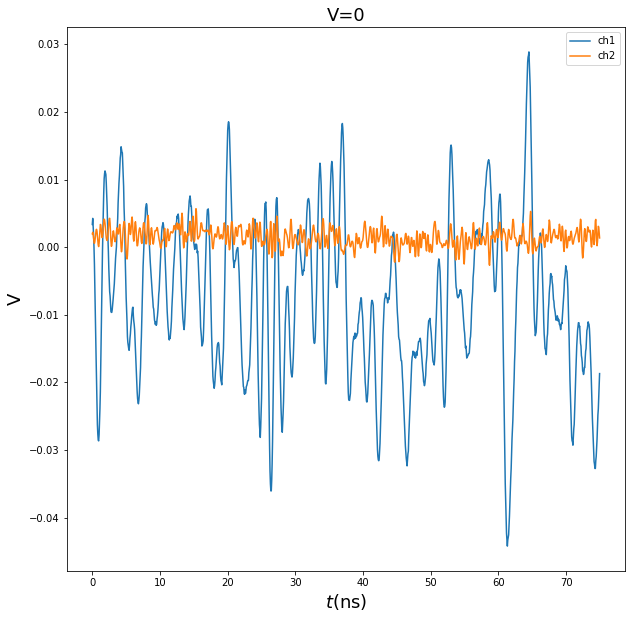

In [5]:
fig = plt.figure(figsize=(10,10))
plt.plot(time[0:1200],ch1[0:1200], label="ch1")
plt.plot(time[0:1200],ch2[0:1200], label="ch2")


plt.legend()
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("$t$(ns)",fontsize=18)
plt.title("V=0",fontsize=18)
plt.ylabel("V",fontsize=18)
plt.show()


In [6]:
def timedif(ch1,ch2,time):
    minimal=min(ch1[0:1100])*1.05
    i=0
    while ch1[i]>= minimal:
        i=i+1
    rise= max(ch2)/2
    j=0
    while ch2[j]<= rise:
        j=j+1
    dt= time[j]-time[i] 
    
    return dt




print(timedif(ch1,ch2,time))

53.125


In [7]:
tot(time,ch2)

(177.00000000000003, 5605, 2773)

In [8]:
range(8,1)

range(8, 1)

In [9]:
files=[]
for i in range(len(folder[0:8])):
    files.append(glob.glob("{}/*".format(folder[i])))


files=[]
for i in range(8,16):
    files.append(glob.glob("{}/*".format(folder[i])))


In [10]:
%%time
multipeak=[]
dts=[]
tots=[]
diffs=[]
for j in range(len(files)):
    temp1=[]
    temp2=[]
    temp3=[]
    temp4=[]
    for i in range(len(files[j])):
        data=h5py.File(files[j][i])
        data1=data["Waveforms"]
        ch1= data1["Channel 1"]
        ch2= data1["Channel 2"]
        ch1= ch1["Channel 1Data"]
        ch1= np.array(ch1)
        ch2= ch2["Channel 2Data"]
        ch2= np.array(ch2)
        temp1.append(timedif(ch1,ch2,time))
        tot1,j1, i1=(tot(time,ch2))
        temp2.append(tot1)
        peaks,_ =find_peaks(ch2[j1+10:-1], height=0.08,width=5)
        if len(peaks)>0:
            temp3.append(i)

        diff=time[i1]-time[np.argmin(ch1[0:3000])]
        temp4.append(diff)
        data.close()
    dts.append(temp1)
    tots.append(temp2)
    multipeak.append(temp3)
    diffs.append(temp4)
    
    print(j)


0
1
2
3
4
5
6
7
CPU times: user 11min 16s, sys: 4.25 s, total: 11min 20s
Wall time: 11min 30s


In [11]:
for i in range(len(multipeak)):
    print(len(multipeak[i]))

0
0
2
1
3
20
110
426


In [12]:
v=[0.4,0.6,0.8,1,1.2,1.4,1.6,1.8]


In [13]:
totmean=[]
for i in range(len(tots)):
    totmean.append(np.mean(tots[i]))

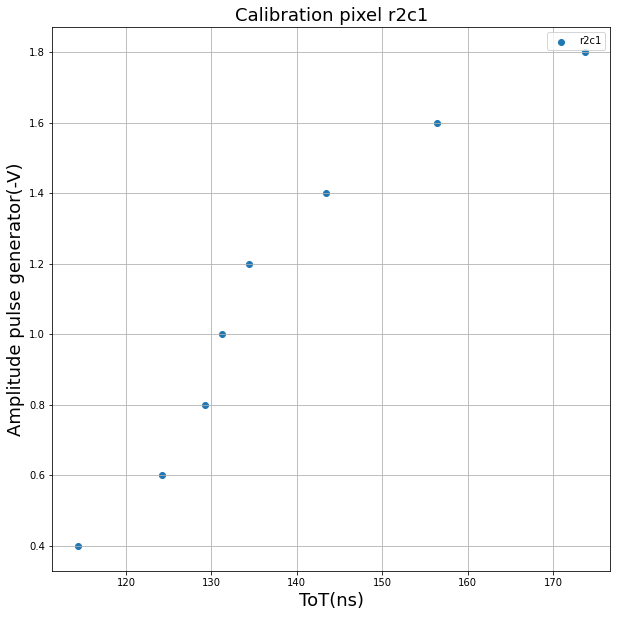

In [14]:
fig = plt.figure(figsize=(10,10))
plt.scatter(totmean,v, label="r2c1")
plt.legend()
fig.patch.set_facecolor('xkcd:white')
plt.ylabel("Amplitude pulse generator(-V)",fontsize=18)
plt.title("Calibration pixel r2c1",fontsize=18)
plt.xlabel("ToT(ns)",fontsize=18)
plt.grid()
plt.show()

In [15]:
electrons=[]
c=6.24*10**18
cont=(2.8*10**-15)*c
for i in range(len(v)):
    d=v[i]*cont
    electrons.append(d)


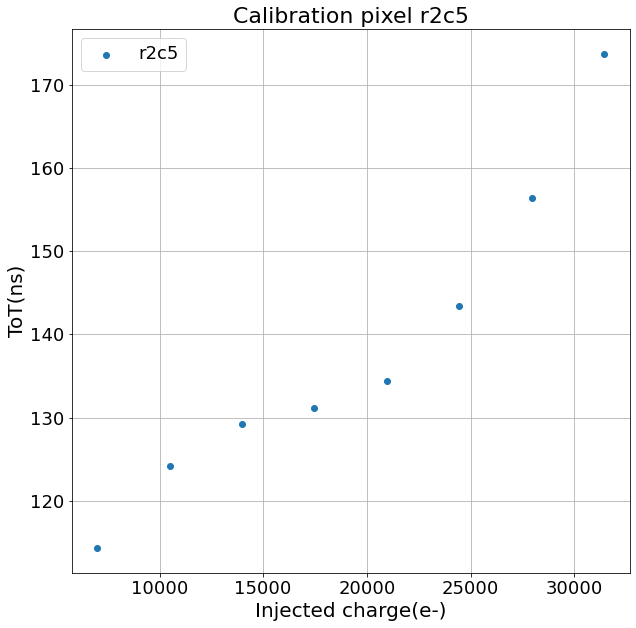

In [16]:
fig = plt.figure(figsize=(10,10))
plt.scatter(electrons,totmean, label="r2c5")
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("Injected charge(e-)",fontsize=20)
plt.title("Calibration pixel r2c5",fontsize=22)
plt.ylabel("ToT(ns)",fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(fontsize=18)

plt.show()

In [17]:
for i in range(len(dts)):
    print(np.std(dts[i]))

0.4936889970549655
1.2574829410130284
16.351704063800174
16.692076839751554
16.128565087465542
15.846100345933374
16.401412205668223
16.122167836672173


In [18]:
cont*2.5

43680.0

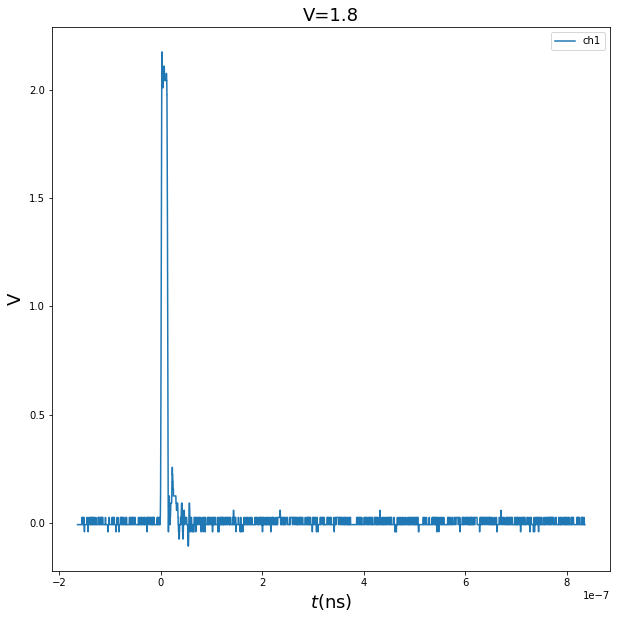

In [19]:
data=h5py.File("20221011-181608_10.h5")
data.keys()
time= data["Time"]
volt= data["Voltage"]
time=np.array(time)
volt= np.array(volt)



fig = plt.figure(figsize=(10,10))
plt.plot(time,volt, label="ch1")


plt.legend()
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("$t$(ns)",fontsize=18)
plt.title("V=1.8",fontsize=18)
plt.ylabel("V",fontsize=18)
plt.show()
